# Tarea 2 Machine learning

## Integrantes
Gabriel Molina
18-394-302-8

Ignacio Norambuena
Tu Rol

## 1. Tipos de fronteras en Clasificación
Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.

Éste dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:

In [1]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from __future__ import print_function

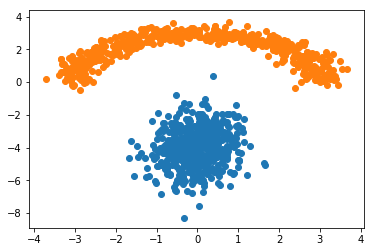

In [2]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
plt.scatter(datos1[:,0], datos1[:,1])
plt.scatter(datos2[:,0], datos2[:,1])
plt.show()

(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada conjunto y visualícelos.

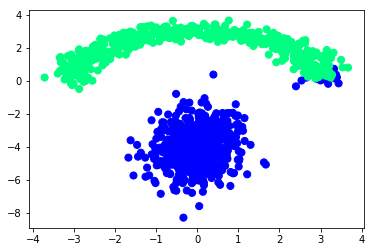

In [3]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()

## Nota:
Como se puede notar, se agrego ruido intencionalmente para simular datos mas proximos a la realidad, ya que nunca se encontrara datos sin ruido o complemtanente separados

Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:

In [4]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()
models = []

(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.

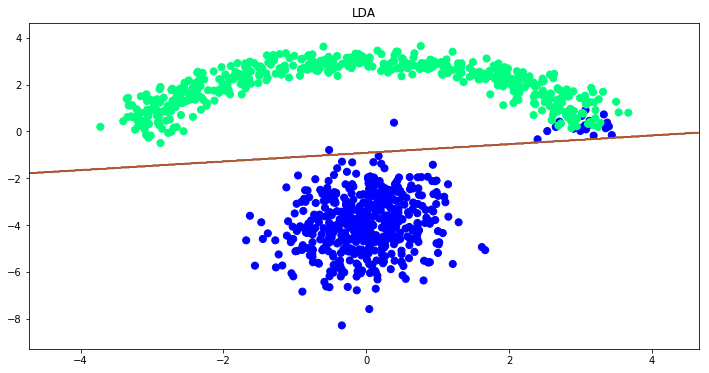

In [5]:
model = LDA()
model.fit(X,y)
yhat_LDA = model.predict(X)
visualize_border(model,X,y,"LDA")
models.append(model)

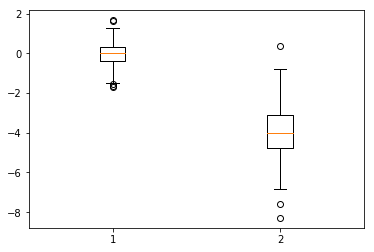

In [6]:
plt.boxplot(datos1)
plt.show()

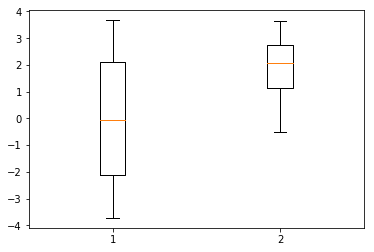

In [7]:
plt.boxplot(datos2)
plt.show()

## Respuesta
A pesar de que el hyperplano logra separar la gran mayoria de los datos de ambos conjuntos, se puede notar la existencia de datos del conjunto 1 (azul) en el conjunto 2 (verde), por lo cual la separacion completa mediante LDA es imposible a menos que trabajemos los datos de una forma mas abrupta, lo cual seria la eliminacion de outliers (facilmente visibles tanto en el grafico de dispresion como en los boxplot) pero se tiene que tener cuidado de esto, ya que la informacion mas valiosa puede existir en los outliers y al eliminarlos perdemos una parte importante de informacion del conjuntos.

(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?


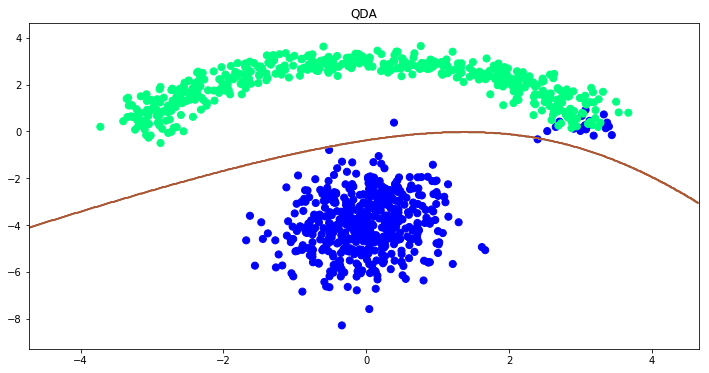

In [8]:
model = QDA()
models.append(model)
model.fit(X,y)
yhat_QDA = model.predict(X)
visualize_border(model,X,y,"QDA")

## Respuesta
QDA se asemeja a LDA ya que no puede separar completamente los datos de ambos cojuntos, tambien a pesar de que la curva de division es distinta (ya que usa metodos cuadraticos) la cantidad de puntos es extremadamente similar (quedando mejor clasificado 1 o 2 puntos con QDA) por lo cual no existe mucha diferencia en el clasificador.
Por otro lado, por simple inspeccion visual QDA se ajusta mejor a la forma del conjunto de datos 2 (verde) por lo cual mi clasificador tendera a tener un poco mas overfitting (muy poco) ya que QDA prioriza la separacion en la concentracion mas grande de datos, a diferencia de LDA que traza una recta intentando dividir el espacio de ambos conjuntos por "la mitad". Pero gracias a este trade off, se tiene un clasificador mejor al momento de ingresarle datos nuevos o comprobarlo con datos de testing

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.

In [9]:
y_pred_QDA = yhat_QDA
y_pred_LDA = yhat_LDA
y_true = y
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_QDA)))
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_LDA)))

Miss Classification Loss QDA: 0.020000
Miss Classification Loss LDA: 0.022000


## Respuesta
Como se puede ver, QDA tiene un mejor desempeño que LDA, esto ocurre por que QDA se adapta mejor al espacio intermedio con forma ovalada, clasificamendo mejor ciertos puntos que quedan fuera si trazamos una linea recta divisora. Todo esto viene de la mano con el incremento del costo computacional de QDA ademas del peligro de tener un incremento del overfitting al ajustar la curva divisora a la forma del conjunto de datos 2 (verde)

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.


In [10]:
def visualize_border_interactive(param):
    model,yhat = train_model(param)
    visualize_border(model,X,y)
    print("Error de Clasificación: %f"%(1-accuracy_score(y_true, yhat)))

train_models = []

(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

In [11]:
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    models.append(model)
    model.fit(X,y)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

### Respuesta

La regresion logistica aplicada a la norma l2 penaliza los datos segun la regla de Lasso, lo cual significa que a medida que disminuimos el parametro (ya que la funcion trabaja con el inverso del parametro, es decir, a mayor C, menor es la regularizacion), mas grande es la penalizacion, esto permite que el modelo se ajuste de mejor forma quitandole importancia a los datos que influyen poco al modelo. En la pantalla interactiva se denota que el modelo se ajusta hasta un valor maximo del parametro igual a un valor de 0.6 ya que despues de esto el error de clasificacion aumenta, por lo cual en este punto se tiene un error de entrenamiento minimo con un ajuste ideal, permitiendo tener una maquina sin mucho overfitting.

(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [12]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    models.append(model)
    model.fit(X,y)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 5
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

### Respuesta
Ya que SVM se encarga de maximizar la minima distancia entre cada uno de los datos y el hyperplano, por lo cual el parametro cumple el mismo objetivo que la norma l2 del ejercicio anterior (penalizar los valores quitandole importancia a los datos que aportar poco al modelo) por lo cual le dice a SVM que datos mal clasificados quiere ignorar al definir el hyperplano por lo cual despues de que C = 0.57 mi error de clasificacion aumenta, ademas si C llega a 4 (a causa de que la funcion toma el inverso del parametro, lo cual indica que pasado este valor no se regulariza para nada), la pendiente del hyperplano no varia notablemente, manteniendose el error de clasificacion.
Por lo cual, actua de la misma forma que Regresión Logística Regularizado con norma l2, ya que al igual que el ejercicio anterior, su parametro de error minimo se encuentra muy aproximado al valor del parametro de la regresion logistica (0.6).
Esto define una maquina con su ajuste ideal.

(g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.

In [13]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

In [14]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 1000000
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

In [15]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

## Respuesta
1. Polynomial: Este kernel hace que el parametro C ajuste el polinomio de la separacion optima de ambos conjuntos de datos (Video que explica visualmente muy bien este kernel: https://www.youtube.com/watch?v=3liCbRZPrZA). Para este kernel el punto optimo donde se diminuye el error es C = 0.7 lo cual se visualiza que es un buen candidato ya que deja espacio para disminuir el overfitting, ademas, pasado un parametro C = 2.07, el error no disminuye pero el hyperplano cambia, dejando distintos modelos para evitar el overfitting.
2. Radial Basic Function: Este kernel encierra el conjunto de datos comparandolos uno por uno y el parametro C castiga el radio de estas separaciones, por lo cual al aumentar el parametro C el modelo normalmente tendera a tener menor error ya que al trabajar con el inverso del valor C (a mayor C menor es la penalisación), pero incrementara considerablemente el overfitting ya que se estara ajustando muy perfectamente a los datos de entrenamiento.
3. Sigmoid: El kernel de Sigmoid o de tangente hyperbolica viene del modelo de las redes neuronales, el cual se denota por la siguiente formula $$k(x, y) = tanh (\alpha x^T y + c)$$ Lamentablemente como no estamos trabajando con redes neuronales, el error de clasificacion es bastante alto en comparacion al resto de los kernels, ademas de que a medida que se aumenta el parametro C se tiene hyperplanos extraños que no van al modelo.
4. Linear: Se trabajo con el en la pregunta anterior



(h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar 
el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.

In [16]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

In [17]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

## Respuesta
Para este ejercicio, se utilizaron el modelo de impureza de Gini y el de ganancia de informacion (Entropy), el parametro C simboliza cuantas separaciones se tendran en el modelo de arbol de desicion el cual permite una mayor profundizacion del arbol dependiendo de su valor.
para ambos modelos, cuando la profundidad maxima del arbol es igual a 11 se tiene un 0% de error de clasificaciones, lo cual significa que se logra separar completamente ambos conjuntos de datos, pero esto no significa que la maquina sea ideal, ya que como se puede ver visualmente la separaciones es muy estrecha en los datos verdes, lo cual significa que el modelo esta sumamente overfiteado lo cual podria tener efectos horribles al ingresar datos nuevos.

(i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

In [18]:
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

## Respuesta
La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los k ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados.
KNN busca localmente los K vecinos mas cercanos, lo cual se define mediante el parametro. Para este caso, con solamente tomar K=1 se tiene un error de clasficicacion del 0% lo que demuestra el exito de mi separacion y si el parametro K aumenta de valor, este incrementando mi error de clasficacion hasta un 2%, por lo cual para evitar el overfitting causado por k=1 se deberia aumentar el valor de K hasta tener un modelo con un error de clasificacion relativamente bueno pero que visualmente deje espacio para nuevos datos (disminuya el overfitting). En este caso, el valor k = 18 deja una division con un error de clasificacion bastante bajo, ademas de que mantiene en "el medio del hyperplano" datos de ambos conjuntos, lo cual disminuye considerablemente el overfitting.

### Resumen

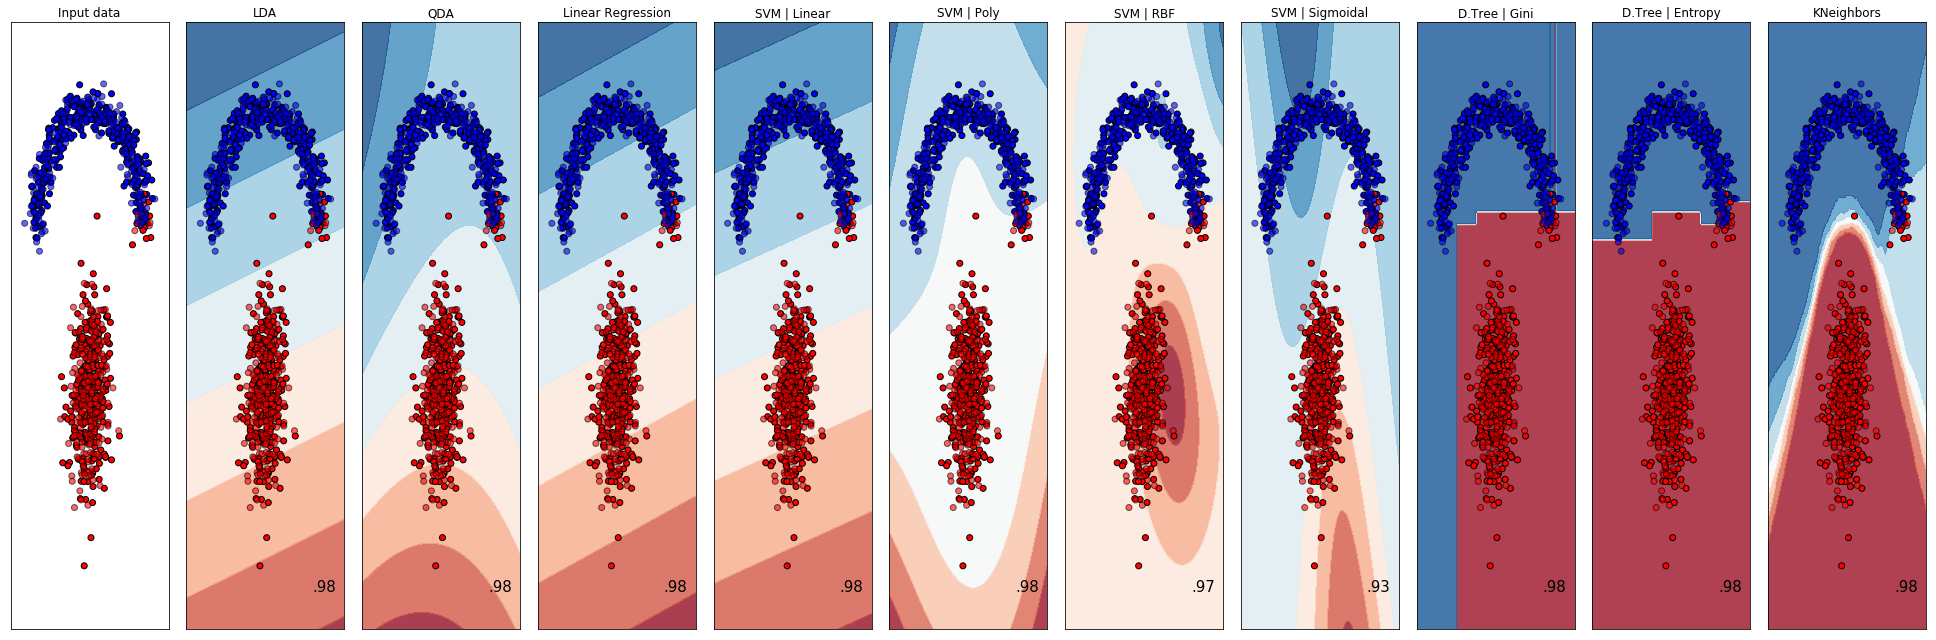

In [19]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def compare(X, y, classifiers):
    h = .02  # step size in the mesh
    
    names = ["LDA", "QDA", "Linear Regression", "SVM | Linear",
    "SVM | Poly", "SVM | RBF", "SVM | Sigmoidal", "D.Tree | Gini",
    "D.Tree | Entropy", "KNeighbors"]
    
    datasets = [(X,y)]
    
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)
    
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()  

compare(X,y,models)

# 2. Análisis de audios como datos brutos


In [19]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    
%matplotlib inline

In [20]:
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


(a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.


In [21]:
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [22]:
df['label'].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

Como se puede apreciar:
1. el dataset cuenta con 176 filas y 4 columnas
2. "dataset" representa el dataset (a o b) al cual corresponde el dato
3. "fname" es el nombre del archivo de audio al cual corresponde el dato
4. "label" corresponde a la etiqueta a la cual corresponde el dato, en los cuales puede ser normal, artifac, extrahis, murmur o puede venir sin clasificar
5. "sublabel" columna que no contiene información

Las etiquetas significan lo siguiente:

1. Normal: Sonido Normal del corazón
2. Murmur: Corresponde a un soplo el cual se reconoce por sonidos turbulentos
3. artifac: Variedad de sonido que en el cual no necesariamente se escuchan sonidos cardiacos, ej: silbidos, llantos
4. extrahis: Sonido extra aparte del corazón 

Por ultimo, la cantidad de datos en cada etiqueta es:

    unlabel     52
    artifact    40
    murmur      34
    normal      31
    extrahls    19

In [23]:
df.drop(['dataset','sublabel'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

(b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

In [24]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


## Dato
Para poder analisar una secuencia de audio, al igual que los datos en matrices multidimensionales, los datos deben estar en la misma escala, es decir, estandarizar los datos, por lo cual el padding de 0 estandariza los datos haciendo que todos tengan el mismo tamaño de serie de tiempo, facilitando los trabajos futuros.

(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

In [25]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64

artifacts:


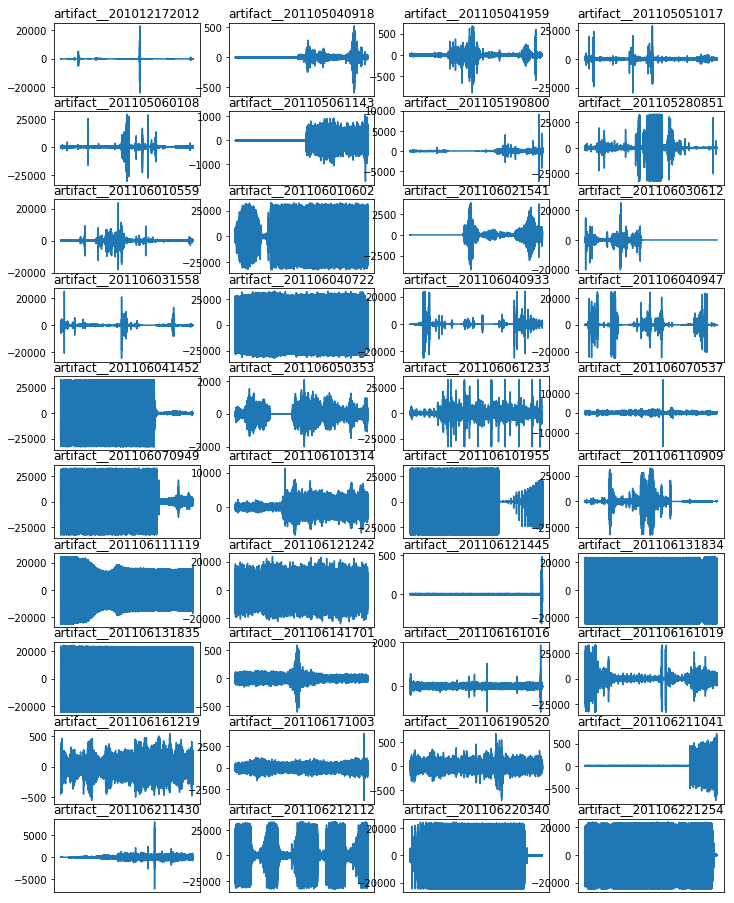

In [26]:
print("artifacts:")
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(new_df['time_series'][i])
    ax[i//4, i%4].set_title(new_df['file_name'][i][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

extrahls:


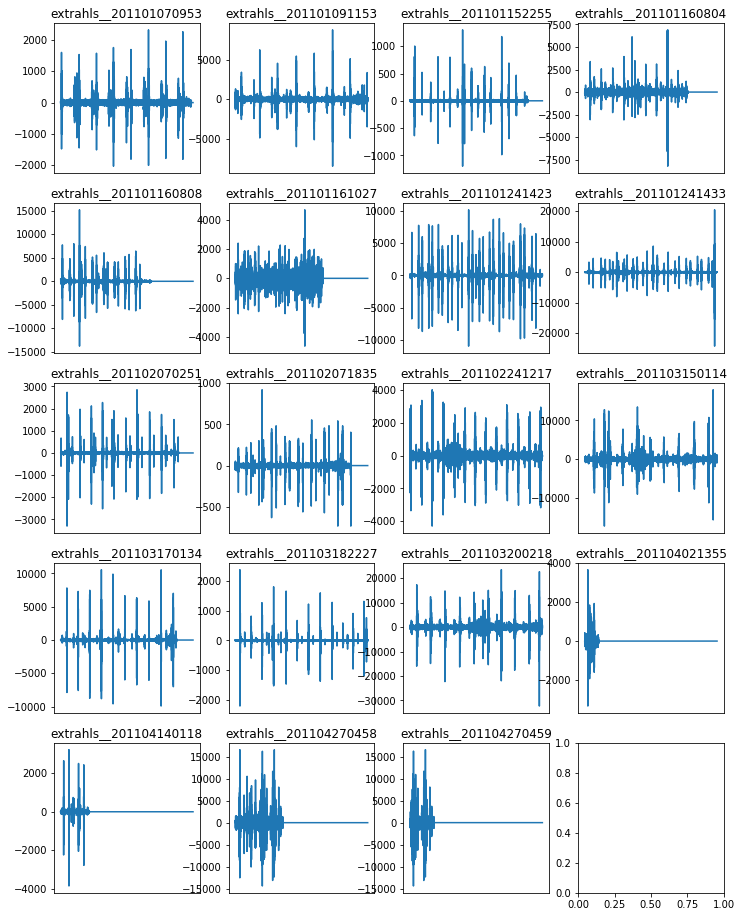

In [27]:
print("extrahls:")
fig, ax = plt.subplots(5, 4, figsize = (12, 16))
for i in range(19):
    ax[i//4, i%4].plot(new_df['time_series'][i+40])
    ax[i//4, i%4].set_title(new_df['file_name'][i+40][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

murmur


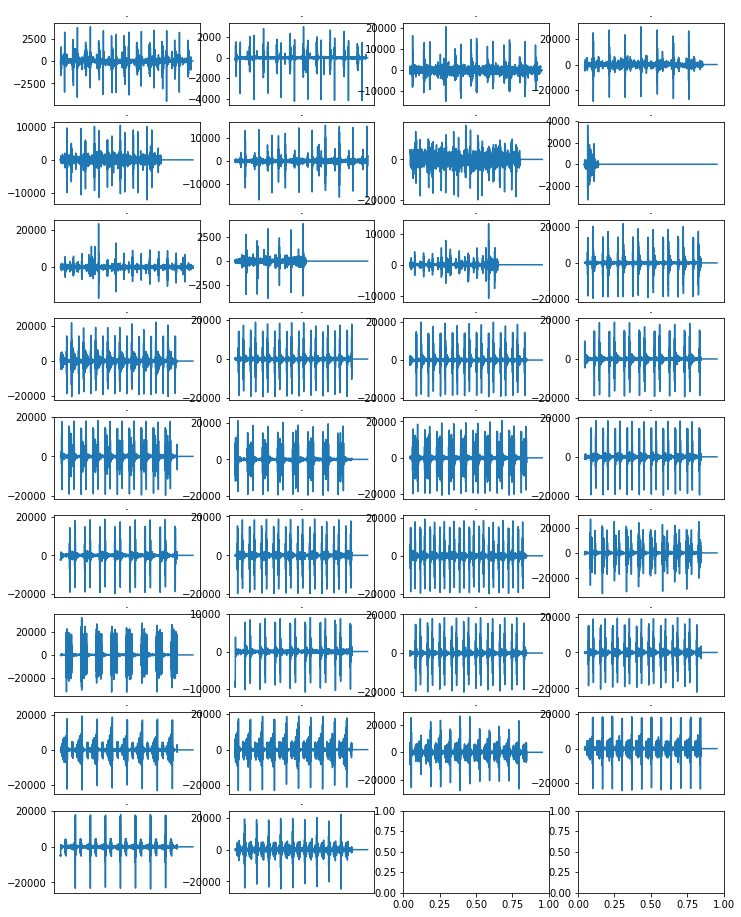

In [28]:
print("murmur")
fig, ax = plt.subplots(9, 4, figsize = (12, 16))
for i in range(34):
    ax[i//4, i%4].plot(new_df['time_series'][i+59])
    ax[i//4, i%4].set_title(new_df['file_name'][i+59][-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

normal


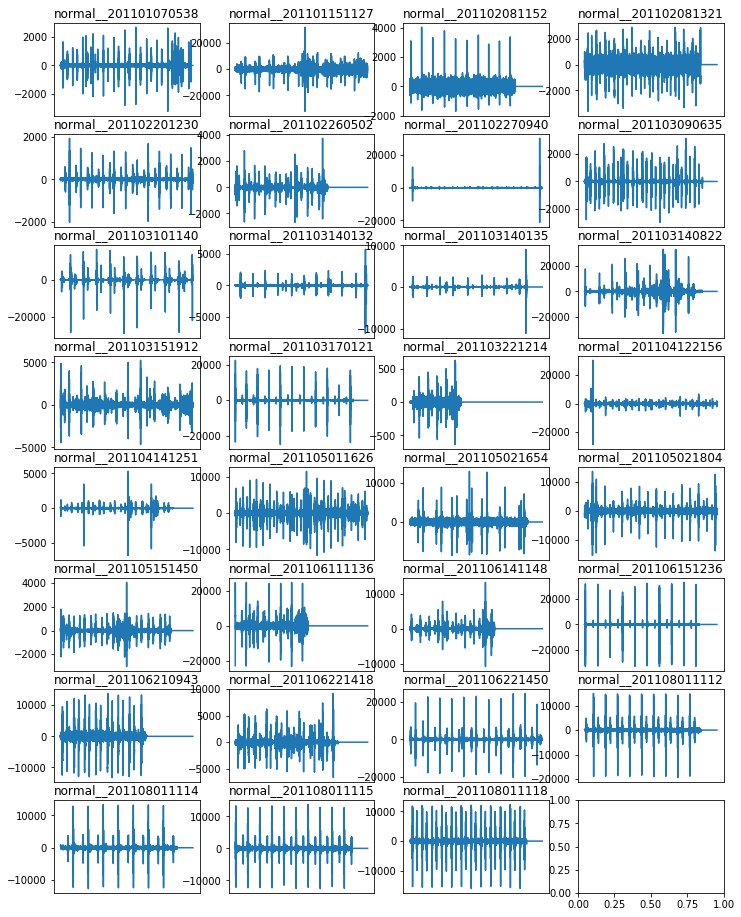

In [29]:
print("normal")
fig, ax = plt.subplots(8, 4, figsize = (12, 16))
for i in range(31):
    ax[i//4, i%4].plot(new_df['time_series'][i+93])
    ax[i//4, i%4].set_title(new_df['file_name'][i+93][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

unclassified


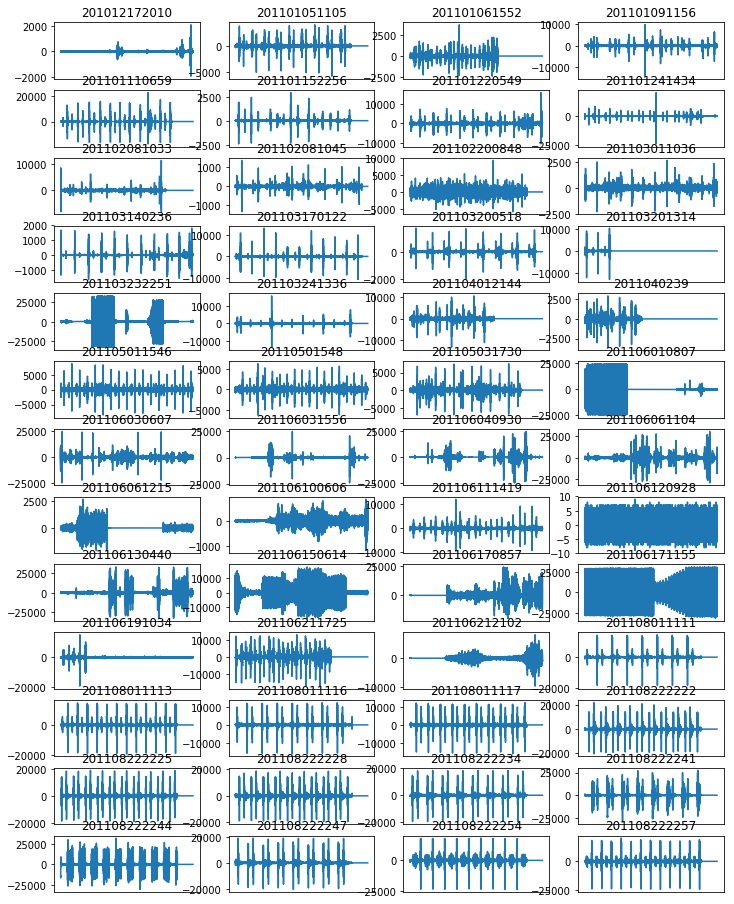

In [30]:
print("unclassified")
fig, ax = plt.subplots(13, 4, figsize = (12, 16))
for i in range(52):
    ax[i//4, i%4].plot(new_df['time_series'][i+124])
    ax[i//4, i%4].set_title(new_df['file_name'][i+124][17:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

Como se puede observar, se tiene normal/extrahls, artifact y murmur tienen 65, 58 y 53 entradas por clase correspondientemente. Cuando se tiene datos mal clasificados, la maquina tiene aprender cosas que no tienen sentido, afecta la precision de mi maquina. Ademas, si tengo suficientes datos y mi modelo es robusto a la existencia de "Label Noise" 1 solo dato mal etiquetado no deberia causar muchos problemas en el aprendizaje de mi maquina, por otro lado, si mi modelo no es robusto ante este ruido, es decir, no tengo adaptado al modelo para que permita los errores de etiquetado en los datos de entrenamiento, 1 solo dato mal etiquetado en la combinacion de una cantidad no muy amplia de datos de entrenamiento, puede afectar considerablemente mi maquina.
Esto se puede solucionar generando un modelo resistente a los errores de etiquetado o el metodo mas comun es que manualmente se depuran los datos mal etiquetados, ya sean dandole su etiqueta correcta, haciendo un sistema de votos en comunidad o borrando el dato.
En este ejemplo, todos los datos fueron re etiquetados por un experto, esto tiene un problema, la maquina al ser entrenada con datos mejor etiquetados, podra tener un mejor resultado pero la maquina posiblementa obtenga un gran overfitting ya que los datos de entrenamiento estaran cesgados a la vista de este experto y al momento de ingresar datos nuevos esto puede generar un gran error de clasificación.

(d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


In [31]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


2    65
0    58
1    53
Name: target, dtype: int64

Como se denota en la informacion del data set, los valores de normal/extrahls, artifact, murmur fueron cambiados a los valores numeros 2, 0 y 1 respectivamente


(e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?


In [32]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

# Revisar con los demas, no estoy seguro de esta respuesta

Basicamente al tener una dimensionalidad tan alta caemos en la maldision de la dimensionalidad, por lo cual la persepcion de distancia se pierde, y la maquina tiene a caer en underfiting, aprendiendo cualquier cosa menos a clasificar correctamente.

(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.


In [33]:
X_fourier = np.abs(np.fft.fft(X))
X

array([[  -85.,  -198.,  -214., ...,  -110.,   -74.,   -76.],
       [   96.,    90.,    84., ...,     0.,     0.,     0.],
       [  220.,   191.,   171., ...,     0.,     0.,     0.],
       ..., 
       [  376.,   413.,   429., ...,     0.,     0.,     0.],
       [ -404.,  -442.,  -456., ...,     0.,     0.,     0.],
       [-2169., -2661., -1605., ...,   435.,   373.,   417.]])

(g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


In [34]:
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

# De nuevo no estoy seguro xDDDDDDD

Por que baja la dimensionalidad y por que se estarasa en serie de fourier??????????

(h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [36]:
X_train.shape

(132, 100000)

In [37]:
X_test.shape

(44, 100000)

In [38]:
print("El set de entrenamiento tiene " + str(len(X_train)) 
      + " y el set de test tiene " + str(len(X_test)) 
      + " datos, y ambos tienen 10000 clases")

El set de entrenamiento tiene 132 y el set de test tiene 44 datos, y ambos tienen 10000 clases


# Ver como mostrar la cantidad de clases

(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [39]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

(j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.


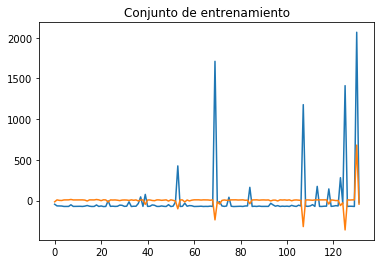

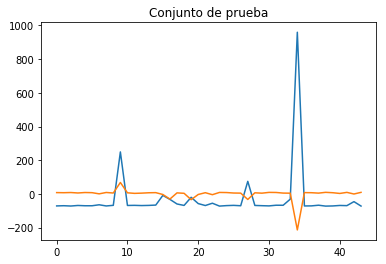

In [40]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

plt.plot(X_pca_train)
plt.title('Conjunto de entrenamiento')
plt.show()
plt.plot(X_pca_test)
plt.title('Conjunto de prueba')
plt.show()



(k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango
que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.

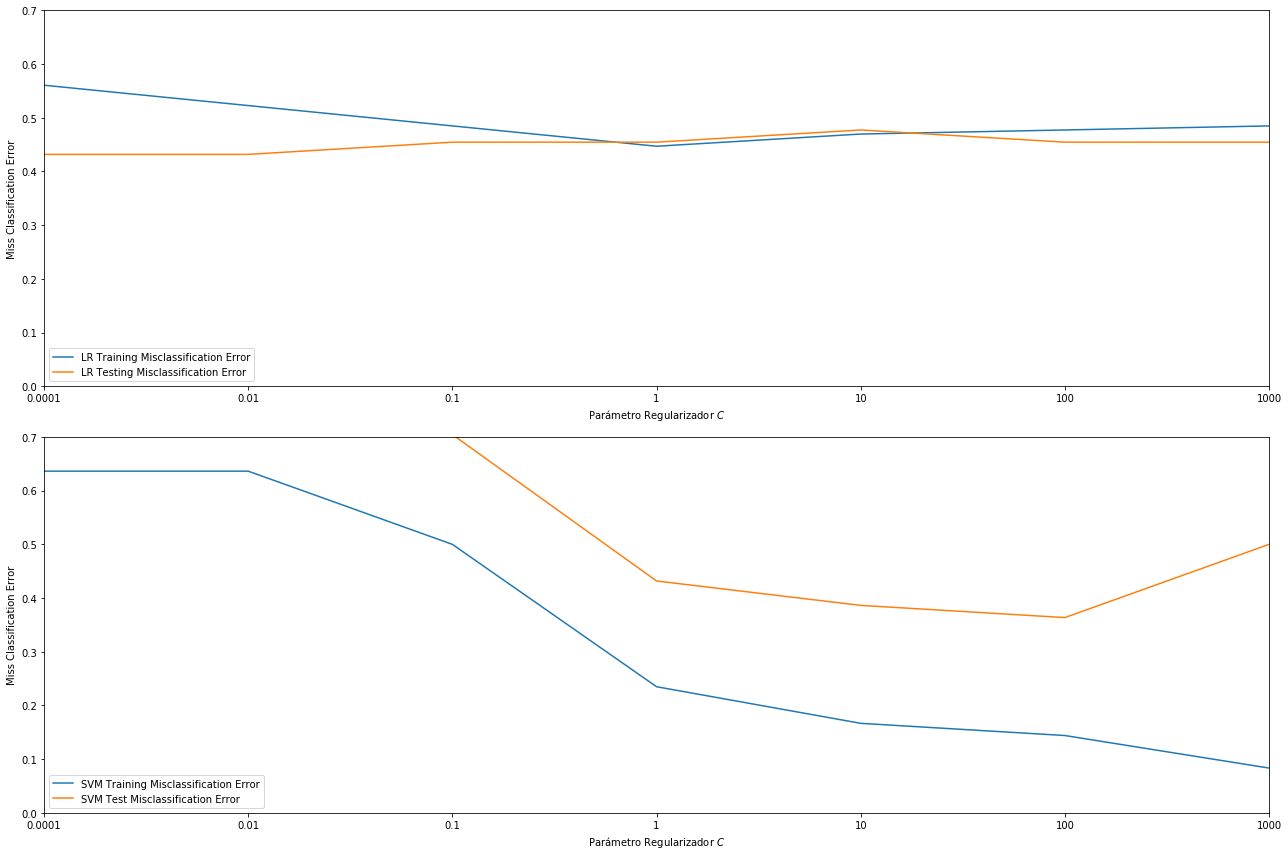

In [41]:
mse_LR_train = []
mse_LR_test = []

mse_SVM_train = []
mse_SVM_test = []

Ks = []
Ks_ticks = [0.0001,0.01,0.1,1,10,100,1000]

for i, Cs in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
    
    model_LR = LR(C=Cs)
    model_SVM = SVM(C=Cs)
    
    model_LR.fit(X_pca_train, y_train)
    model_SVM.fit(X_pca_train, y_train)
    
    y_pred_LR_train = model_LR.predict(X_pca_train)
    y_pred_LR_test = model_LR.predict(X_pca_test)
    
    y_pred_SVM_train = model_SVM.predict(X_pca_train)
    y_pred_SVM_test = model_SVM.predict(X_pca_test)

    mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
    mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))
    
    mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
    mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))
    
    Ks.append(i+1)
    
    #print("Miss Classification Loss for LR: %f"%(1-accuracy_score(y_train, y_pred_LR)))
    #print("Miss Classification Loss for SVM: %f"%(1-accuracy_score(y_train, y_pred_SVM)))
    
    #print("C=%.5f" % Cs)
    

plt.figure(figsize=(18,12))

LR_plot = plt.subplot(2,1,1)
LR_plot.plot(Ks, mse_LR_train, label='LR Training Misclassification Error')
LR_plot.plot(Ks, mse_LR_test, label='LR Testing Misclassification Error')
plt.legend(loc=3)
plt.xlabel('Parámetro Regularizador $C$')
plt.ylabel('Miss Classification Error')
plt.axis([1,6,0.0, 0.7])
plt.xticks(Ks, Ks_ticks)

SVM_plot = plt.subplot(2,1,2)    
SVM_plot.plot(Ks, mse_SVM_train, label = 'SVM Training Misclassification Error')
SVM_plot.plot(Ks, mse_SVM_test, label = 'SVM Test Misclassification Error')
plt.legend(loc=3)
plt.xlabel('Parámetro Regularizador $C$')
plt.ylabel('Miss Classification Error')
plt.axis([1,6,0.0, 0.7])
plt.xticks(Ks, Ks_ticks)

plt.tight_layout()

#plt.xlabel('Parametro Regularización $C$')
#plt.ylabel('Miss Classification Error')

plt.show()


(l) Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro
regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.

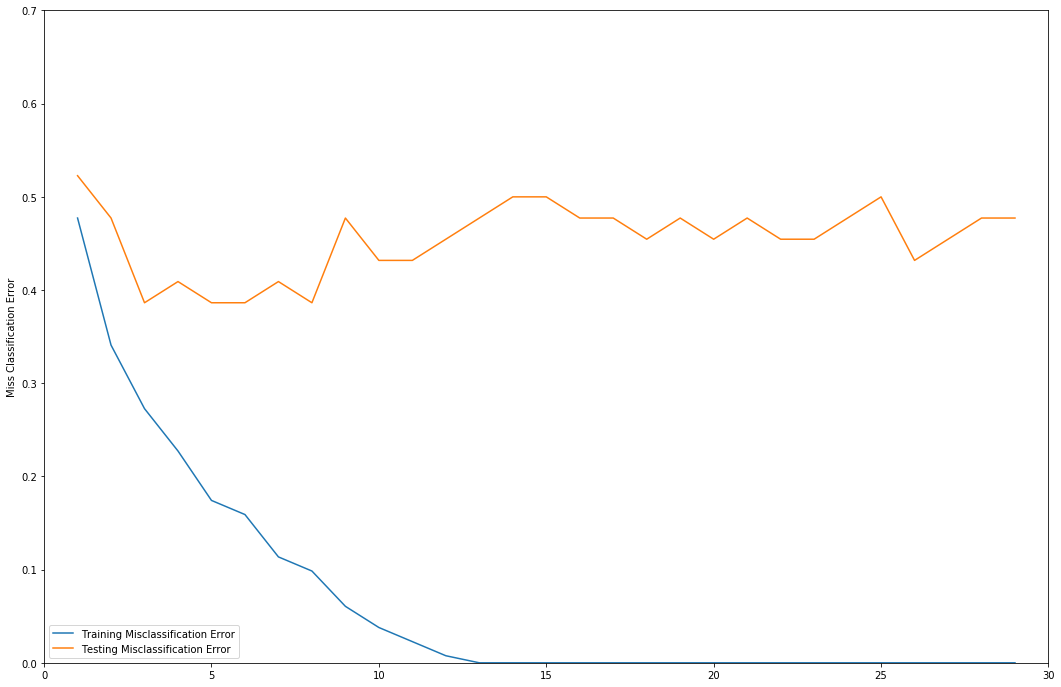

In [42]:
from sklearn.tree import DecisionTreeClassifier as DTC
Depths = range(1,30)

mse_DTC_train = []
mse_DTC_test = []

for i in Depths:
    model_DTC = DTC(max_depth = i)
    
    model_DTC.fit(X_pca_train, y_train)
    
    y_pred_DTC_train = model_DTC.predict(X_pca_train)
    y_pred_DTC_test = model_DTC.predict(X_pca_test)
    
    mse_DTC_train.append(1-accuracy_score(y_train, y_pred_DTC_train))
    mse_DTC_test.append(1-accuracy_score(y_test, y_pred_DTC_test))

plt.figure(figsize=(18,12))

DTC_plot = plt.subplot(1,1,1)
DTC_plot.plot(Depths, mse_DTC_train, label='Training Misclassification Error')
DTC_plot.plot(Depths, mse_DTC_test, label='Testing Misclassification Error')
plt.legend(loc=3)
plt.ylabel('Miss Classification Error')
plt.axis([0,30,0.0, 0.7])

plt.show()

(m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.


In [43]:
def plots_MCE_PCA(D, C_LR, C_SVM):
    mse_LR_train = []
    mse_LR_test = []
    mse_SVM_train = []
    mse_SVM_test = []

    model_LR = LR(C=1000)
    model_SVM = SVM(C=1)

    dim = np.arange(1,D)

    for d in range(1,D):

        pca_model = PCA(n_components=d)
        pca_model.fit(X_train)

        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)

        model_LR.fit(X_pca_train, y_train)
        model_SVM.fit(X_pca_train, y_train)

        y_pred_LR_train = model_LR.predict(X_pca_train)
        y_pred_LR_test = model_LR.predict(X_pca_test)

        y_pred_SVM_train = model_SVM.predict(X_pca_train)
        y_pred_SVM_test = model_SVM.predict(X_pca_test)

        mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
        mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))
        mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
        mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))


    plt.figure(figsize=(18,12))

    LR_plot = plt.subplot(2,1,1)
    LR_plot.plot(dim, mse_LR_train, label='LR Training Misclassification Error')
    LR_plot.plot(dim, mse_LR_test, label='LR Testing Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')

    SVM_plot = plt.subplot(2,1,2)    
    SVM_plot.plot(dim, mse_SVM_train, label = 'SVM Training Misclassification Error')
    SVM_plot.plot(dim, mse_SVM_test, label = 'SVM Test Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')
    plt.tight_layout()

    #plt.xlabel('Parametro Regularización $C$')
    #plt.ylabel('Miss Classification Error')

    plt.show()  

widgets.interact(plots_MCE_PCA,D = (1,20),C_LR = (1,1000,1),C_SVM=(1,1000,1))

<function __main__.plots_MCE_PCA>

(n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


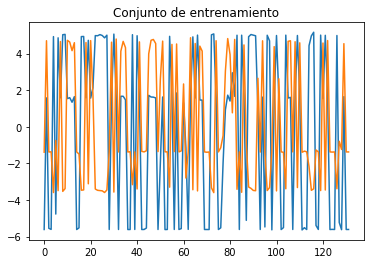

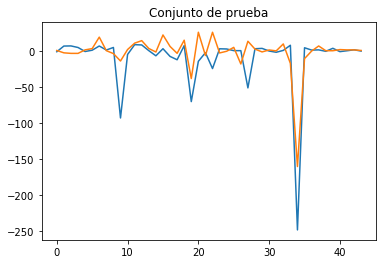

In [44]:
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

plt.plot(X_pca_train)
plt.title('Conjunto de entrenamiento')
plt.show()
plt.plot(X_pca_test)
plt.title('Conjunto de prueba')
plt.show()


https://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training

## La manza caga sajkasjksajk xD

(o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.

(p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

# 3. Análisis de emociones en tweets

In [45]:
import pandas as pd
import re
import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
nltk.download('stopwords')

ModuleNotFoundError: No module named 'preprocessor'

(a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros
por clase y describa el dataset.

In [ ]:
df = pd.read_csv('./text_emotion.csv')
df.info()
df.shape

In [ ]:
df.head()

In [ ]:
df['sentiment'].value_counts()

Como se puede apreciar:
1. el dataset cuenta con 40000 filas y 4 columnas
2. "tweet_id" representa el id (asignado por tweeter) que se le da a cierto comentario/publicación creado por cierto autor
3. "sentiment" es el sentimiento (etiqueta o label) que se le asigno previamente a cierto comentario/publicación, el cual puede ser neutral, worry, happiness, sadness, love, surpirse, fun, relief, hate, empty, enthusiasm, boredom o anger
4. "author" es el author del comentario/publicación
5. "content" es el comentario/publicación de cierto autor

Las etiquetas son emociones humanas que ya todos conocemos, por lo cual se omitara el paso de explicarlas.

Por ultimo, la cantidad de datos en cada etiqueta es:

    neutral       8638
    worry         8459
    happiness     5209
    sadness       5165
    love          3842
    surprise      2187
    fun           1776
    relief        1526
    hate          1323
    empty          827
    enthusiasm     759
    boredom        179
    anger          110

In [ ]:
df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

In [ ]:
df['sentiment'].hist(bins=25, figsize=(22,16))
plt.show()

(b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para
verificar los resultados de los algoritmos.

In [ ]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [ ]:
df_train.info()
df_train.shape

In [ ]:
df_test.info()
df_test.shape

### Comentario
Los datos estan acorde al 80% de los datos para el entrenamiento y el 20% restante para pruebas ya que por documentacion es la mejor distribucion simple para division de datos

(c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.


In [ ]:
df = pd.read_csv('./text_emotion.csv')
df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

In [ ]:
stopwords = stopwords.words('english')
df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False)
df['content'] = df['content'].str.replace('@[^\s]+[\s]?', '', case=False)
df['content'] = df['content'].str.replace('\s?[0-9]+\.?[0-9]*', '', case=False)
df['content'] = df['content'].str.replace('Not Available', '', case=False)
for i in range(df.shape[0]):
    df['content'].values[i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",df['content'].values[i]).split())
    df['content'].values[i] = ' '.join(filter(lambda x: x.lower() not in stopwords,  df['content'][i].split()))



## Respuesta
para esta sección, la limpieza de los datos incluye:

1. Eliminación de caracteres especiales como ",", ":", "\"", "=", "&", ";", "%", etc.
2. Eliminacion de Urls.
3. Eliminación de numeros.
4. Eliminación de nombres de usuario.
5. Eliminación de secciones no disponibles.
6. Eliminación de Palabras vacías.

La explicación de cada eliminación se debe a que:

1. Los caracteres especial no denotan sentimiento alguno.
2. Las Urls no expresan sentimiento.
3. Numeros tampoco desmuestran algun tipo de sentimiento a menos que se incluyan en emojis, pero por simplicidad se eliminan.
4. Los nombres de usuario en el contenido del mensaje no son importantes para el analisis de sentimientos, ya que simplemente se puede saber por el resto del contenido del mensaje
5. Por simplicidad se eliminan estas secciones para dejar mas limpio el mensaje
6. Palabras que no aportan nada en el analisis de sentimientos(stopwords o Palabra vacía), como por ejemplo:

   able,about,across,among,an,and,any,but,by,can,cannot,could,dear,did,do,does,either,else,ever,got,had,has,have,he,her, etc


(d) Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.

Logica a trabajar:

    neutral       0
    worry         -1
    happiness     +1
    sadness       -1
    love          +1
    surprise      +1
    fun           +1
    relief        +1
    hate          -1
    empty         -1
    enthusiasm    +1
    boredom       -1
    anger         -1


In [ ]:
mapping = {"happiness": 1,"love": 1,"surprise": 1,"fun": 1,"relief": 1,"enthusiasm": 1,'worry':-1,'sadness':-1,'hate':-1,'empty':-1,'boredom':-1,'anger':-1,'neutral':0}
df = df.replace({'sentiment': mapping})
df = df[df.sentiment != 0]
df['sentiment'].value_counts()

(e) Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets {ti}_n_i=1 disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets. 
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (CountVectorizer
y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento,
para luego transformar el conjunto de pruebas (con el método transform).


In [ ]:
X = df['content'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
frecuencia_terminos = TfidfVectorizer(lowercase=True)
X_train_vectorize = frecuencia_terminos.fit_transform(X_train) #Como indica el enunciado
X_test_vectorize = frecuencia_terminos.transform(X_test)       #Como indica el enunciado

(f) Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria
(por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles
de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos
(entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

# Falta Graficar las funciones mediante lo realizado en la parte 2

# Regresión logística

In [ ]:
model = LR()
model.fit(X_train_vectorize,y_train)
yhat_LR_train = model.predict(X_train_vectorize)
yhat_LR_test = model.predict(X_test_vectorize)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LR_train)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LR_test)))

# SVM

In [ ]:
model= SVM()
model.set_params(kernel='linear')
model.fit(X_train_vectorize,y_train)
yhat_SVM_train = model.predict(X_train_vectorize)
yhat_SVM_test = model.predict(X_test_vectorize)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_SVM_train)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_SVM_test)))

# QDA

In [ ]:
# %%time
# model = QDA()
# model.fit(X_train_vectorize.toarray(),y_train)
# yhat_QDA_train = model.predict(X_train_vectorize.toarray())
# yhat_QDA_test = model.predict(X_test_vectorize.toarray())

# print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_QDA_train)))
# print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_QDA_test)))

# LDA

In [ ]:
# %%time
# model = LDA()
# model.fit(X_train_vectorize.toarray(),y_train)
# yhat_LDA_train = model.predict(X_train_vectorize)
# yhat_LDA_test = model.predict(X_test_vectorize)

# print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LDA_train)))
# print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LDA_test)))

# Desicion Tree

In [ ]:
model= Tree()
model.set_params(criterion='gini',splitter='best')
model.fit(X_train_vectorize,y_train)
yhat_Tree_train = model.predict(X_train_vectorize)
yhat_Tree_test = model.predict(X_test_vectorize)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_Tree_train)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_Tree_test)))

(g) Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?

In [ ]:
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("Training Accuracy: %f"%(acc_tr))
    print("Test Accuracy: %f"%(acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y_test, model.predict(X_test), target_names=['+','-']))


(h) [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print(sentiment, text)

(i) Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.

(j) Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada tweet, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

(k) Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest [14]


In [ ]:
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

(l) Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

In [ ]:
LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')


(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos
mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?